In [29]:
import pandas as pd

In [125]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
train.shape

(891, 12)

In [34]:
test.shape

(418, 11)

In [35]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

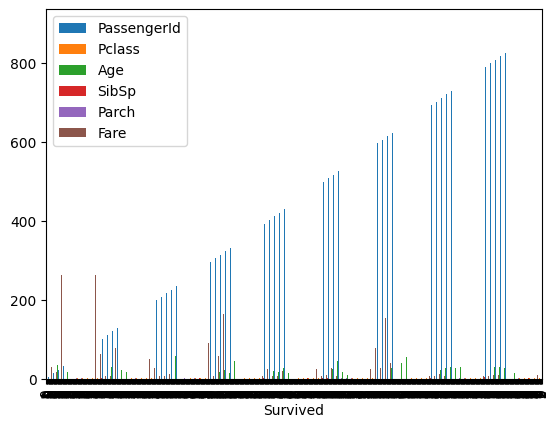

In [36]:
train.plot.bar('Survived')

<Axes: xlabel='Survived'>

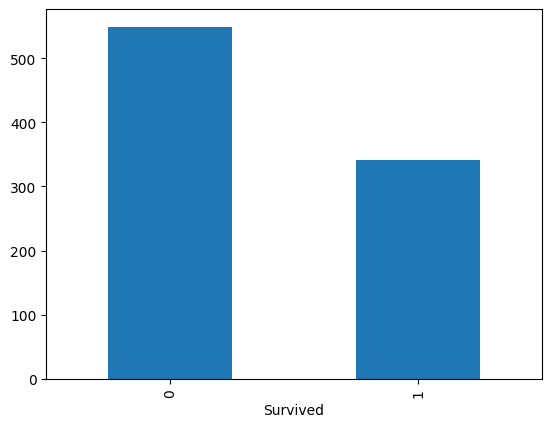

In [37]:
train['Survived'].value_counts().plot.bar('Survived')

### Missing values

In [38]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
missing_value_train = train.isnull().sum()
percentage_missing_value_train = missing_value_train / len(train) * 100

In [40]:
percentage_missing_value_train

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [41]:
missing_value_train = pd.concat([missing_value_train, percentage_missing_value_train], axis=1)
missing_value_train.columns = ["No. of missing values", "Percentage of missing values"]
missing_value_train

,No. of missing values,Percentage of missing values
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [42]:
missing_value_test = test.isnull().sum()
percentage_missing_value_test = missing_value_test / len(test) * 100
percentage_missing_value_test

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

### Reason why the data is missing

In [43]:
%pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [44]:
import missingno as msno

<Axes: >

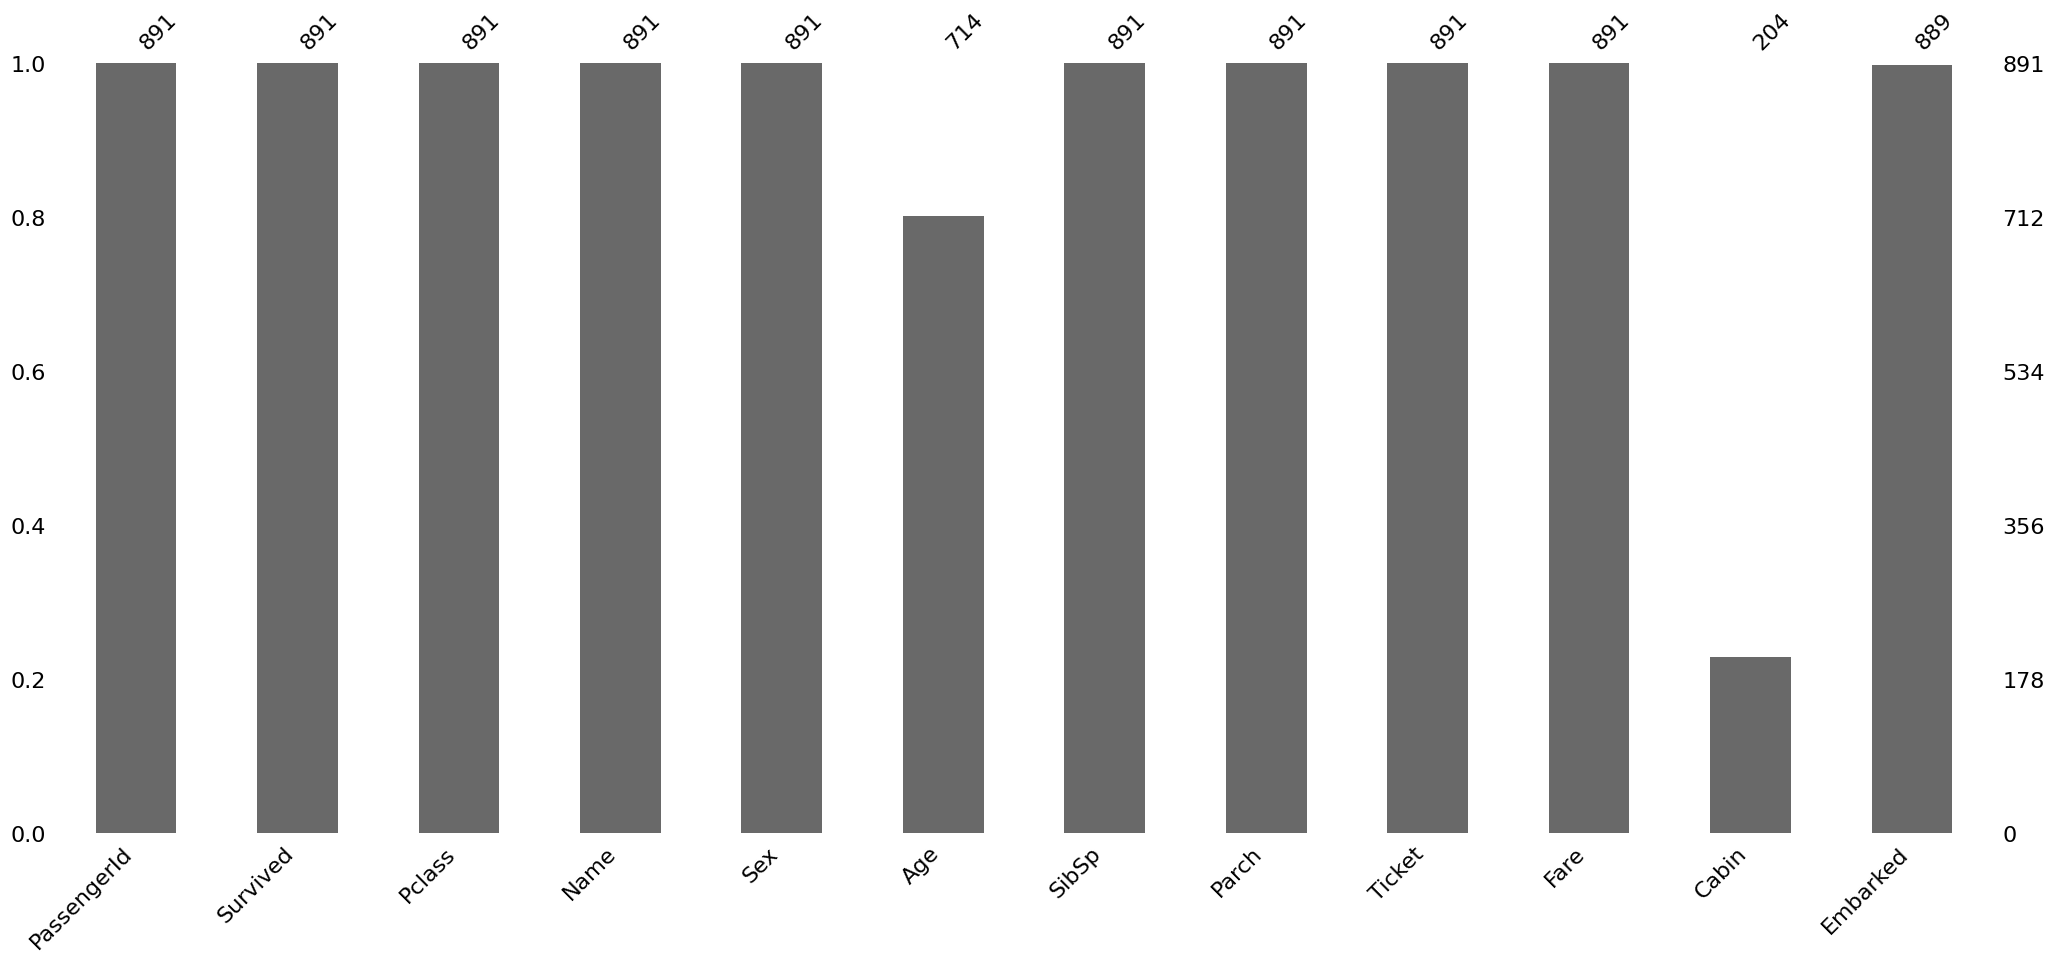

In [45]:
msno.bar(train)

<Axes: >

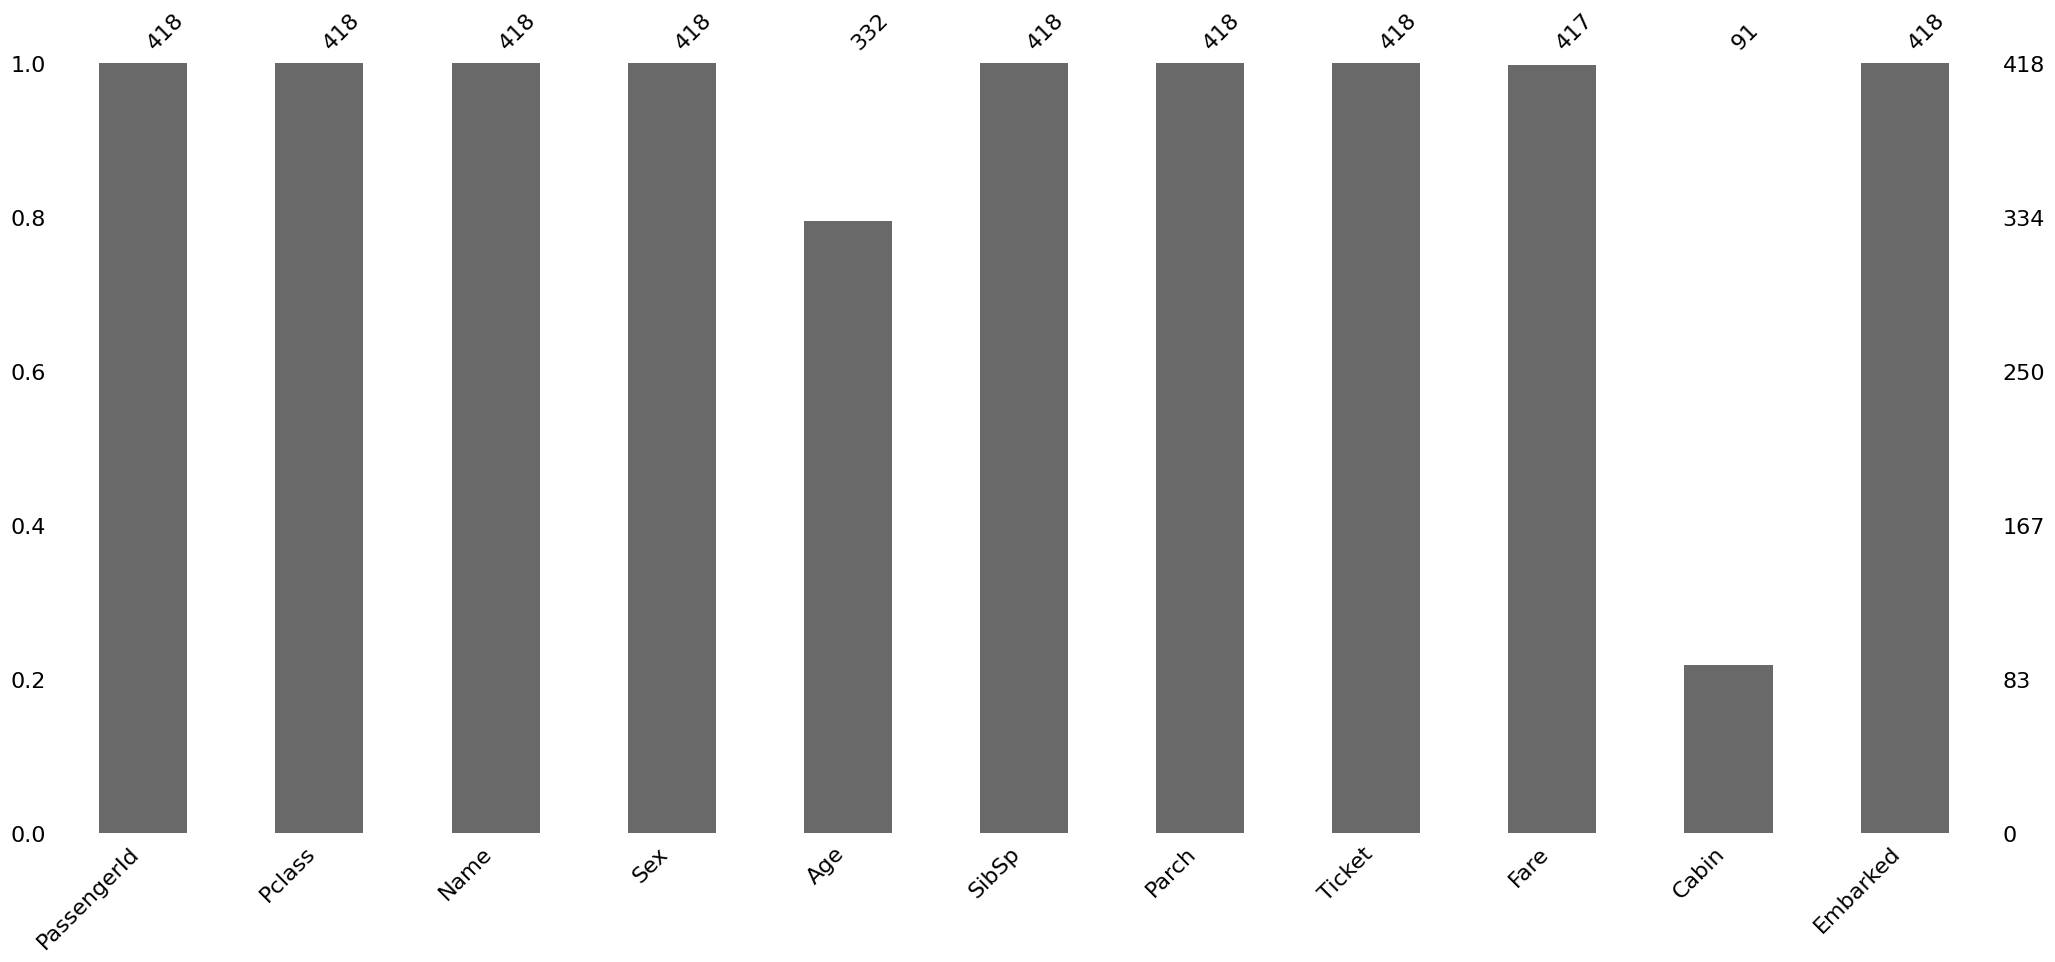

In [46]:
msno.bar(test)

<Axes: >

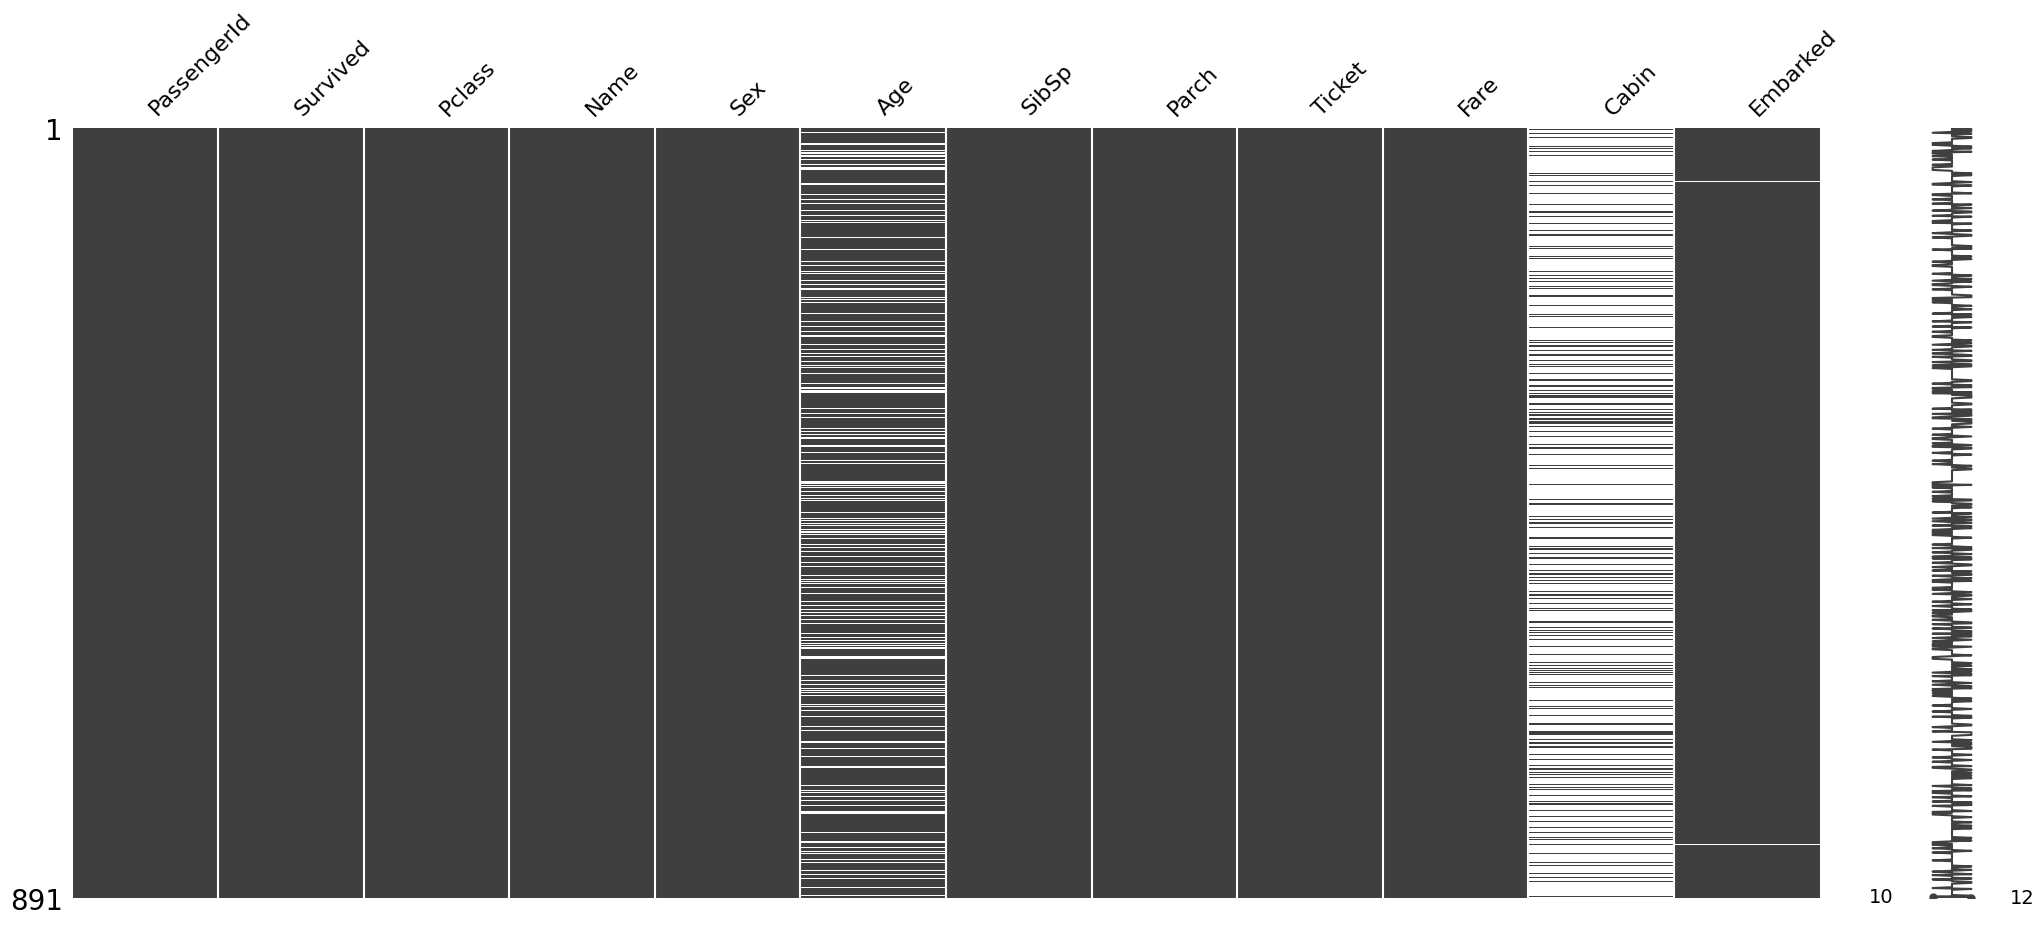

In [47]:
msno.matrix(train)

<Axes: >

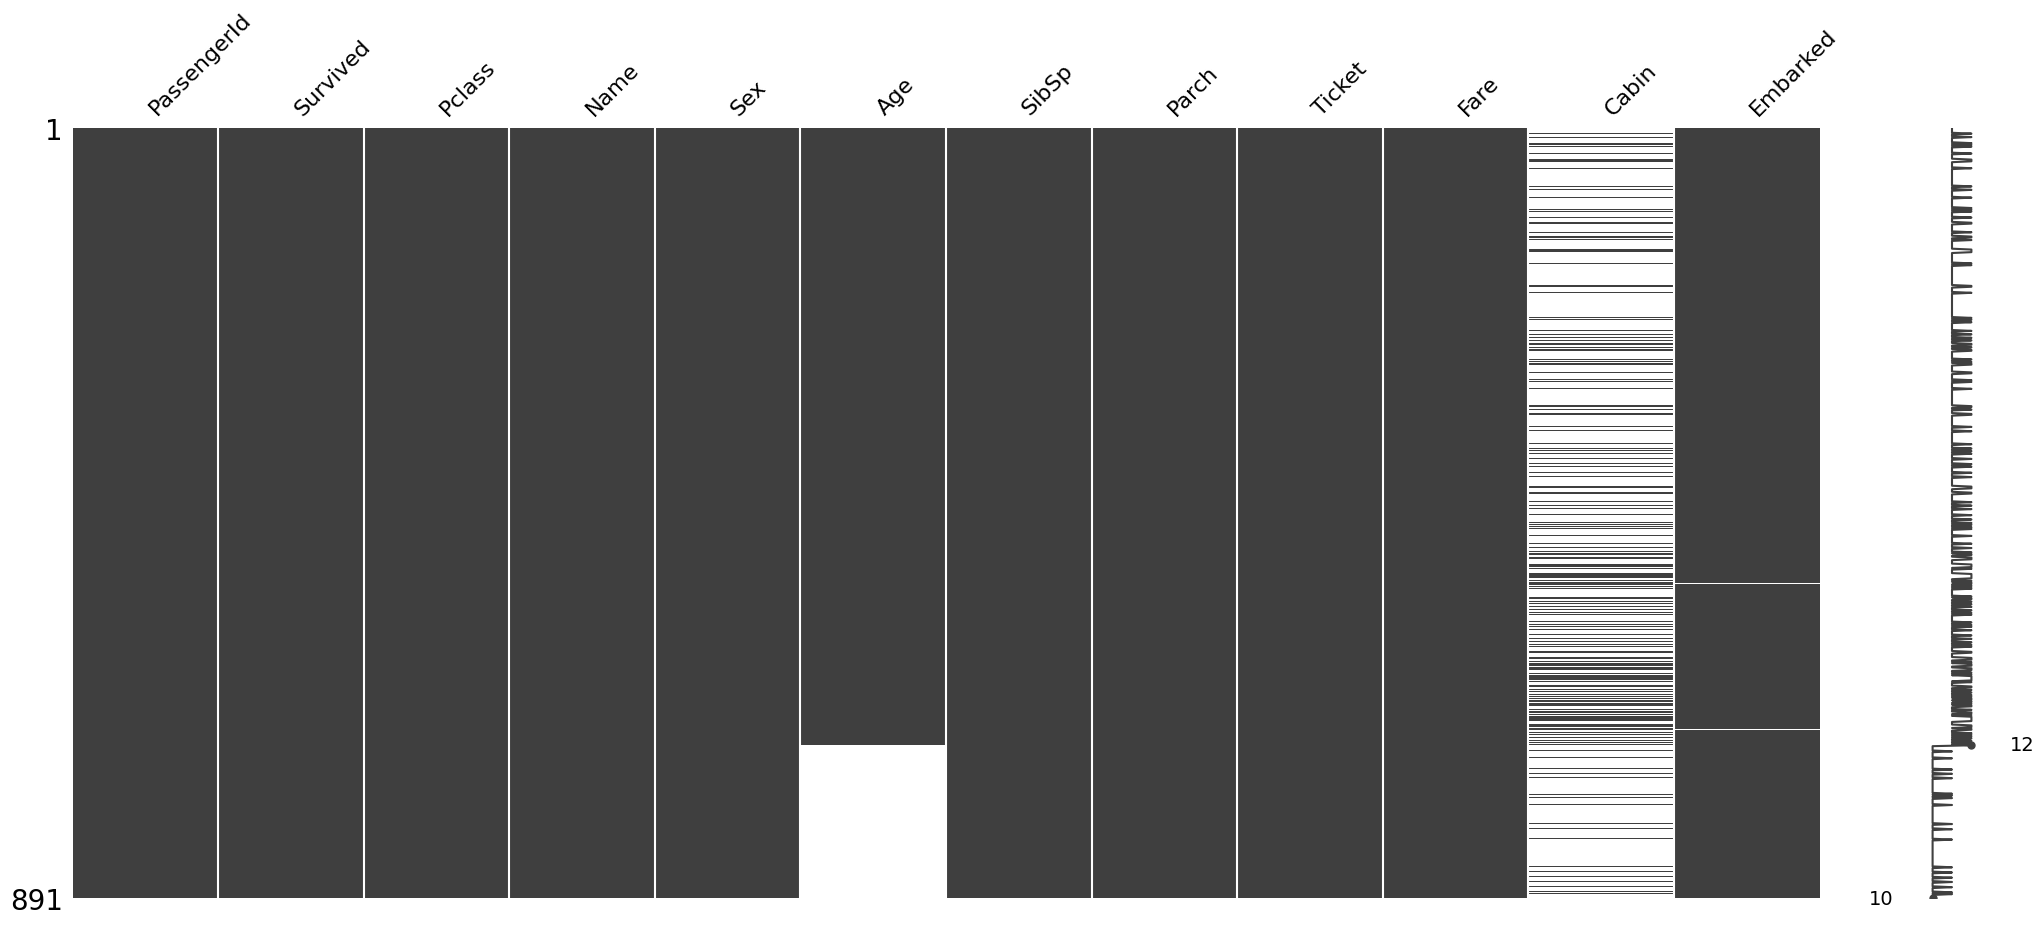

In [48]:
msno.matrix(train.sort_values('Age'))

<Axes: >

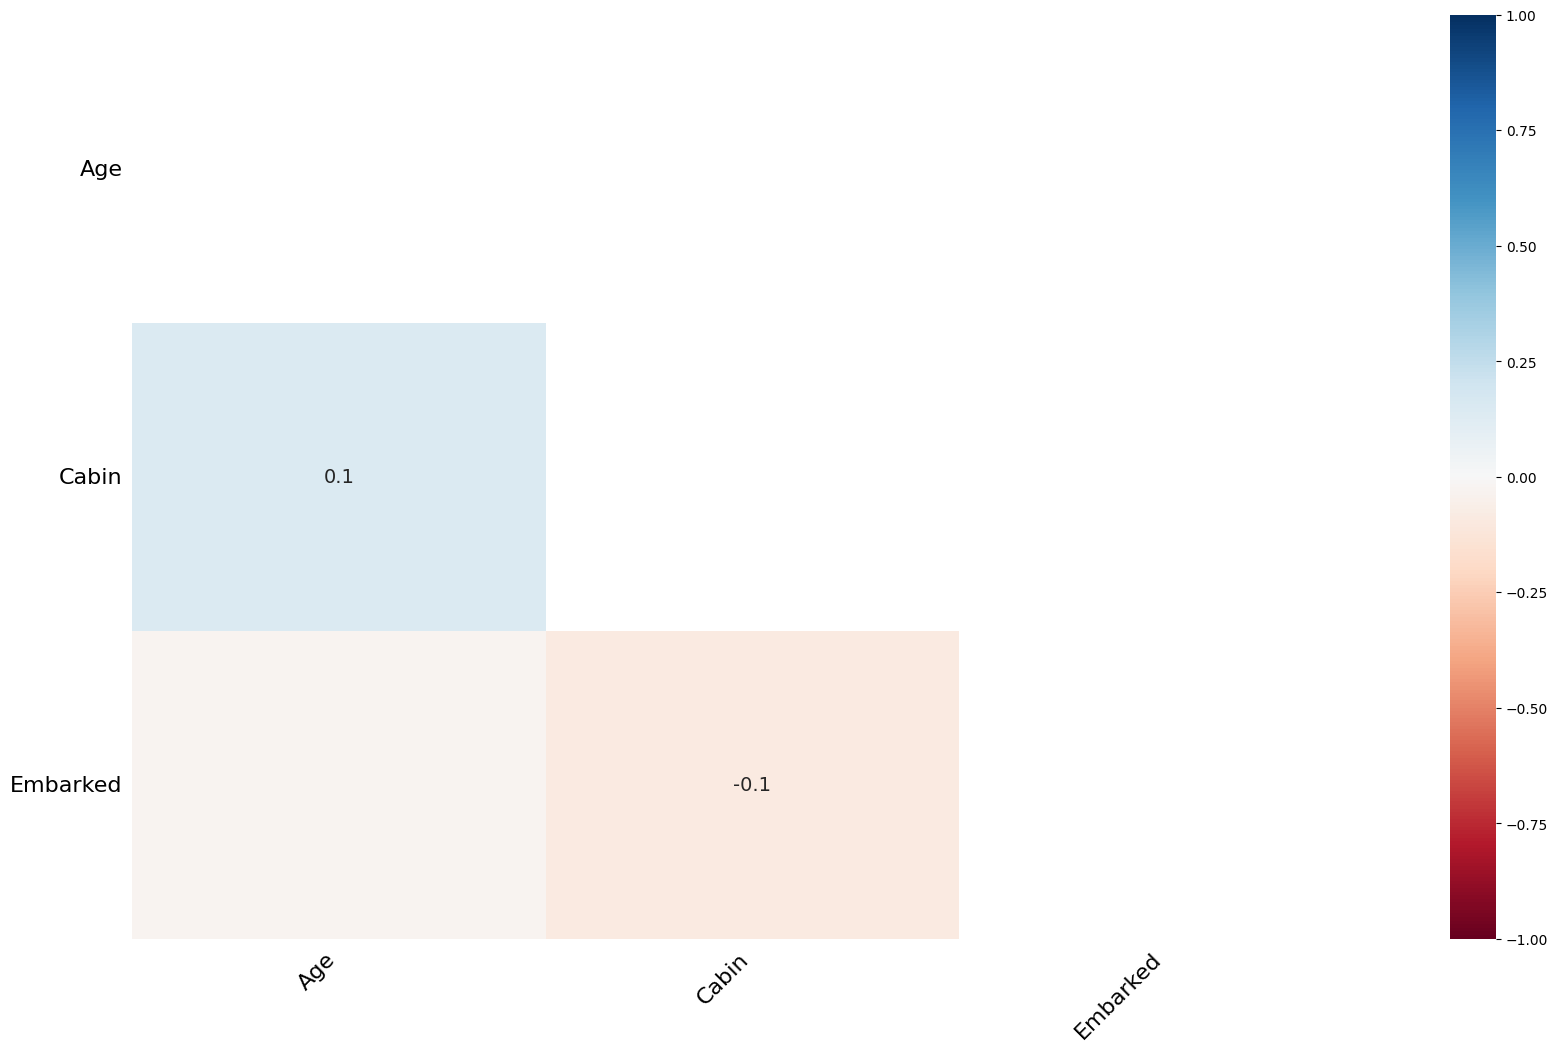

In [49]:
msno.heatmap(train)

<Axes: >

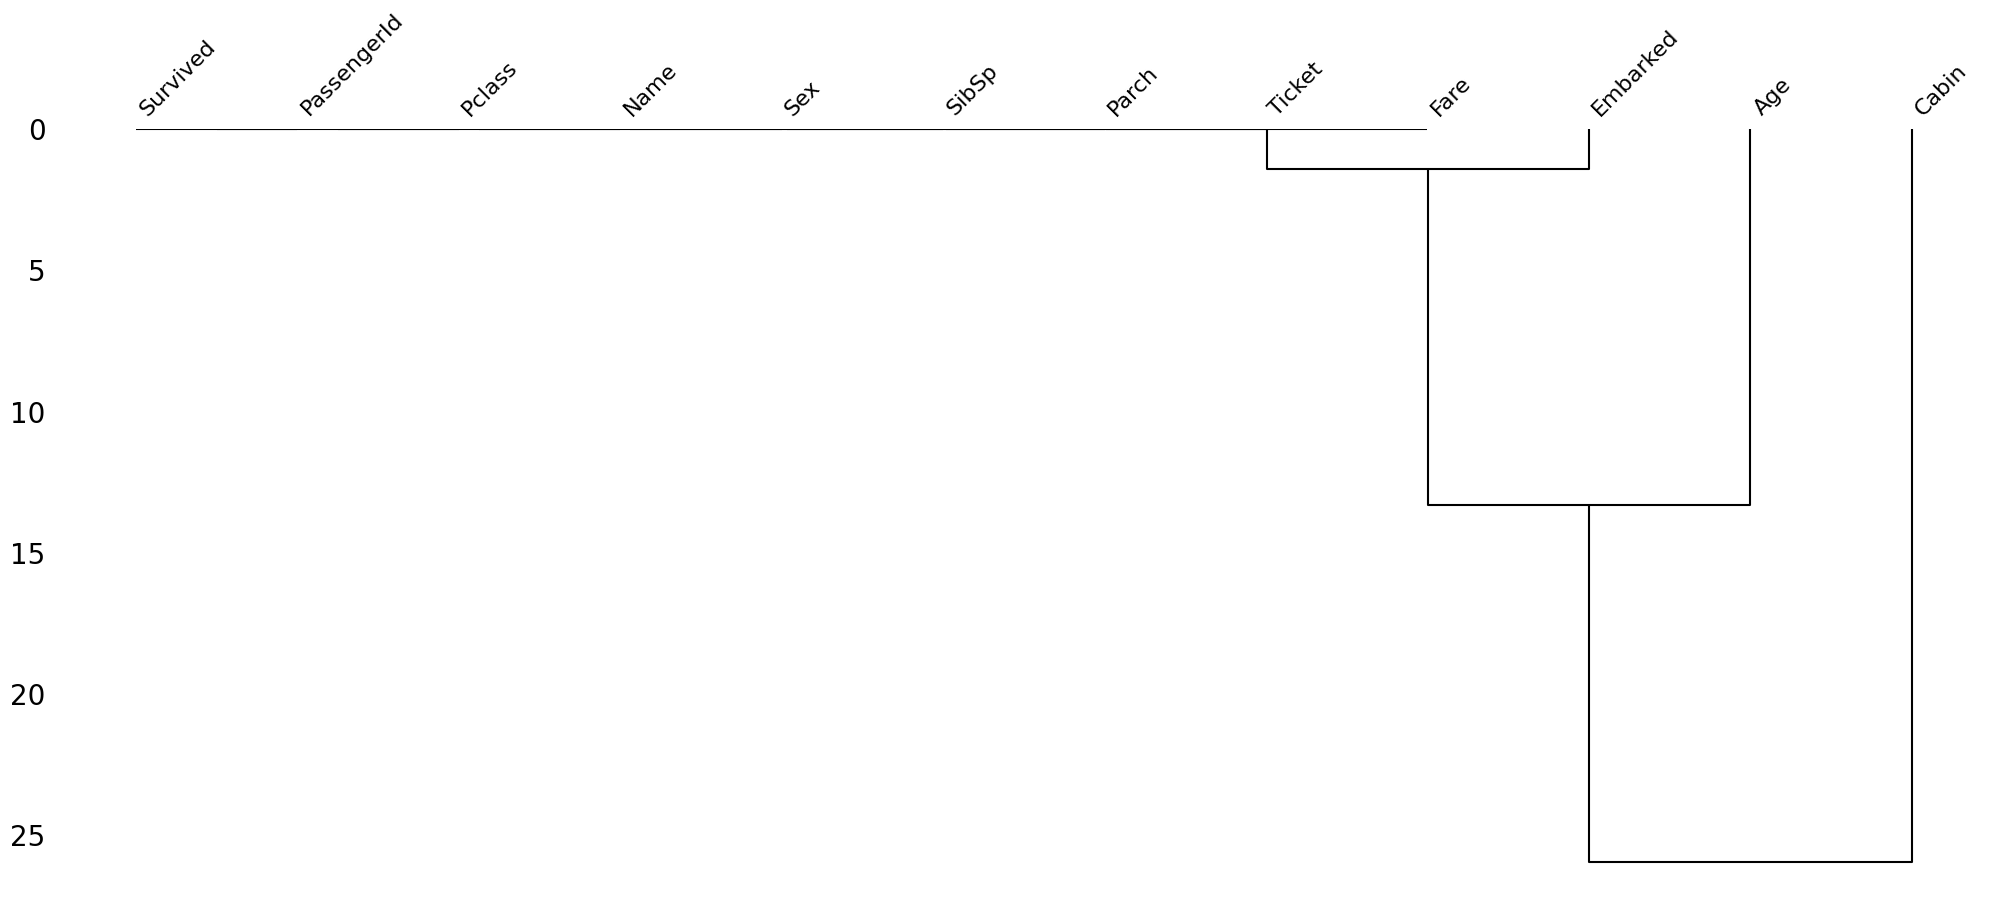

In [50]:
msno.dendrogram(train)

### Imputation > General - Data change

In [51]:
train1 = train.copy()

In [52]:
train1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [53]:
train1['Age'].mean()

29.69911764705882

In [54]:
train1.dropna(subset=['Age'], how='any' ,inplace=True)

In [55]:
train1.Age.isnull().sum()

0

In [56]:
train.Age.isnull().sum()

177

In [57]:
train1.shape

(714, 12)

In [58]:
891 - 177

714

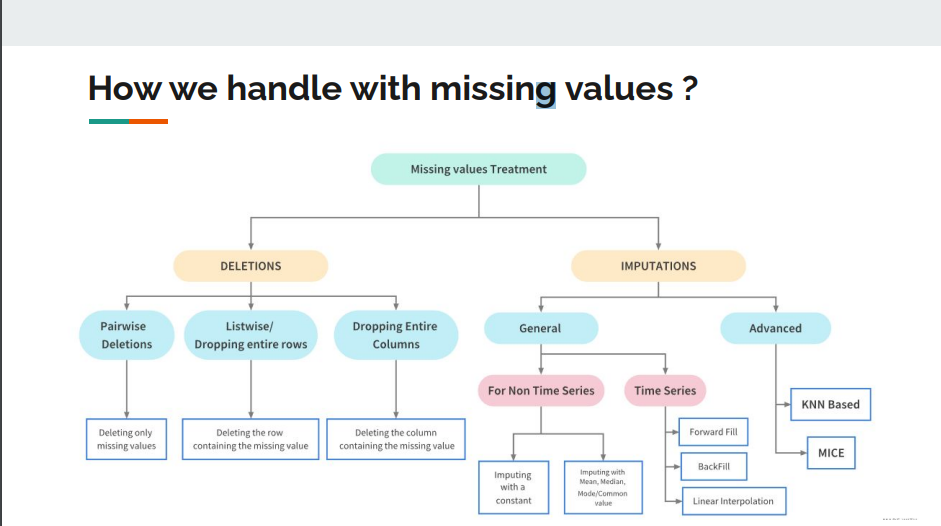

In [59]:
train1 = train.copy()
train1.iloc[:,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [60]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [61]:
from sklearn.impute import SimpleImputer # on some places it will help me to add some strategy

In [62]:
imp = SimpleImputer(strategy='constant', fill_value=0)
train1.iloc[:,:] = imp.fit_transform(train1) # 'fit_transform' -> look for 'None' values and change them to zeros (fill value)

In [63]:
train1.iloc[:,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [64]:
train1.iloc[0,2]

3

In [65]:
train1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
imp = SimpleImputer(strategy='most_frequent')
train1.iloc[:,:] = imp.fit_transform(train1)

NameError: name 'SimpleImputer' is not defined

In [67]:
train1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [68]:
train1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [69]:
train.Age.head(50)[40:50]

40    40.0
41    27.0
42     NaN
43     3.0
44    19.0
45     NaN
46     NaN
47     NaN
48     NaN
49    18.0
Name: Age, dtype: float64

In [70]:
train1.Age.head(50)[40:50]

40    40.0
41    27.0
42     0.0
43     3.0
44    19.0
45     0.0
46     0.0
47     0.0
48     0.0
49    18.0
Name: Age, dtype: float64

### Imputation > Advanced - KNN

In [71]:
train1 = train.copy()

In [72]:
#k=2
#normalization (min-max scaler)
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

In [73]:
train1['Age'].to_numpy()

array([22.  , 38.  , 26.  , 35.  , 35.  ,   nan, 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  ,   nan,
       31.  ,   nan, 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  ,   nan,
       19.  ,   nan,   nan, 40.  ,   nan,   nan, 66.  , 28.  , 42.  ,
         nan, 21.  , 18.  , 14.  , 40.  , 27.  ,   nan,  3.  , 19.  ,
         nan,   nan,   nan,   nan, 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  ,   nan, 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  ,   nan,   nan, 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  ,   nan,   nan,  0.83, 30.  , 22.  ,
       29.  ,   nan, 28.  , 17.  , 33.  , 16.  ,   nan, 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  ,   nan, 71.  , 23.  , 34.  ,
       34.  , 28.  ,   nan, 21.  , 33.  , 37.  , 28.  , 21.  ,   nan,
       38.  ,   nan, 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  ,   nan, 32.5 , 32.5 , 54.  , 12.  ,
         nan, 24.  ,

In [74]:
train1['Age'].to_numpy().reshape(-1, 1)

array([[22.  ],
       [38.  ],
       [26.  ],
       [35.  ],
       [35.  ],
       [  nan],
       [54.  ],
       [ 2.  ],
       [27.  ],
       [14.  ],
       [ 4.  ],
       [58.  ],
       [20.  ],
       [39.  ],
       [14.  ],
       [55.  ],
       [ 2.  ],
       [  nan],
       [31.  ],
       [  nan],
       [35.  ],
       [34.  ],
       [15.  ],
       [28.  ],
       [ 8.  ],
       [38.  ],
       [  nan],
       [19.  ],
       [  nan],
       [  nan],
       [40.  ],
       [  nan],
       [  nan],
       [66.  ],
       [28.  ],
       [42.  ],
       [  nan],
       [21.  ],
       [18.  ],
       [14.  ],
       [40.  ],
       [27.  ],
       [  nan],
       [ 3.  ],
       [19.  ],
       [  nan],
       [  nan],
       [  nan],
       [  nan],
       [18.  ],
       [ 7.  ],
       [21.  ],
       [49.  ],
       [29.  ],
       [65.  ],
       [  nan],
       [21.  ],
       [28.5 ],
       [ 5.  ],
       [11.  ],
       [22.  ],
       [38.  ],
       [

In [75]:
scaler = MinMaxScaler()
scaler.fit_transform(train1['Age'].to_numpy().reshape(-1, 1))

array([[0.27117366],
       [0.4722292 ],
       [0.32143755],
       [0.43453129],
       [0.43453129],
       [       nan],
       [0.67328474],
       [0.01985423],
       [0.33400352],
       [0.17064589],
       [0.04498618],
       [0.72354863],
       [0.24604172],
       [0.48479517],
       [0.17064589],
       [0.68585072],
       [0.01985423],
       [       nan],
       [0.3842674 ],
       [       nan],
       [0.43453129],
       [0.42196532],
       [0.18321186],
       [0.34656949],
       [0.09525006],
       [0.4722292 ],
       [       nan],
       [0.23347575],
       [       nan],
       [       nan],
       [0.49736115],
       [       nan],
       [       nan],
       [0.8240764 ],
       [0.34656949],
       [0.52249309],
       [       nan],
       [0.25860769],
       [0.22090978],
       [0.17064589],
       [0.49736115],
       [0.33400352],
       [       nan],
       [0.03242021],
       [0.23347575],
       [       nan],
       [       nan],
       [     

In [76]:
train1['Age'] = scaler.fit_transform(train1['Age'].to_numpy().reshape(-1, 1))

In [77]:
train1['Age']

0      0.271174
1      0.472229
2      0.321438
3      0.434531
4      0.434531
         ...   
886    0.334004
887    0.233476
888         NaN
889    0.321438
890    0.396833
Name: Age, Length: 891, dtype: float64

In [78]:
imp = KNNImputer(n_neighbors=2)

In [79]:
train1['Age'] = imp.fit_transform(train1['Age'].to_numpy().reshape(-1, 1))

In [80]:
train1['Age'].isnull().sum()

0

### Imputation > Advanced - MICE

In [81]:
train1 = train.copy()

In [82]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp_mean = IterativeImputer(random_state=0)

In [83]:
train1['Age'] = imp_mean.fit_transform(train1['Age'].to_numpy().reshape(-1, 1))

In [84]:
train1['Age'].isnull().sum()

0

### Imputations > General - Time series
#### air quality data

In [85]:
import pandas as pd

In [86]:
df = pd.read_csv('./data_air_quality/city_day.csv')

In [87]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [88]:
df_missing_values = df.isnull().sum()
perc_df = df.isnull().sum() / len(df) * 100
df_missing = pd.concat([df_missing_values, perc_df], axis=1)
df_missing.columns = ['No. of missing values', '% of missing values']
df_missing

,No. of missing values,% of missing values
City,0,0.000000
Date,0,0.000000
PM2.5,4598,15.570079
PM10,11140,37.723071
NO,3582,12.129626
NO2,3585,12.139785
NOx,4185,14.171549
NH3,10328,34.973418
CO,2059,6.972334
SO2,3854,13.050692


### FFILL

In [89]:
df1 = df.copy()
df1.fillna(method='ffill', inplace=True)

C:\Users\Ace\AppData\Local\Temp\ipykernel_23852\3582551557.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1.fillna(method='ffill', inplace=True)


In [90]:
df['Xylene'][50:70]

50     7.48
51    15.44
52     8.47
53    28.46
54     6.05
55     0.81
56      NaN
57      NaN
58      NaN
59     1.32
60     0.22
61     2.25
62     1.55
63     4.13
64      NaN
65     0.39
66     0.63
67     1.35
68     1.74
69     2.78
Name: Xylene, dtype: float64

In [91]:
df1['Xylene'][50:70]

50     7.48
51    15.44
52     8.47
53    28.46
54     6.05
55     0.81
56     0.81
57     0.81
58     0.81
59     1.32
60     0.22
61     2.25
62     1.55
63     4.13
64     4.13
65     0.39
66     0.63
67     1.35
68     1.74
69     2.78
Name: Xylene, dtype: float64

### BFILL

In [92]:
df1 = df.copy()
df1.fillna(method='bfill', inplace=True)

C:\Users\Ace\AppData\Local\Temp\ipykernel_23852\115542073.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1.fillna(method='bfill', inplace=True)


In [93]:
df1['Xylene'][50:70]

50     7.48
51    15.44
52     8.47
53    28.46
54     6.05
55     0.81
56     1.32
57     1.32
58     1.32
59     1.32
60     0.22
61     2.25
62     1.55
63     4.13
64     0.39
65     0.39
66     0.63
67     1.35
68     1.74
69     2.78
Name: Xylene, dtype: float64

In [94]:
df['Xylene'][50:70]

50     7.48
51    15.44
52     8.47
53    28.46
54     6.05
55     0.81
56      NaN
57      NaN
58      NaN
59     1.32
60     0.22
61     2.25
62     1.55
63     4.13
64      NaN
65     0.39
66     0.63
67     1.35
68     1.74
69     2.78
Name: Xylene, dtype: float64

### Linear interpolation 
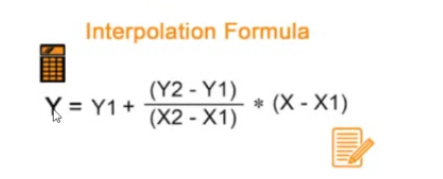

In [95]:
df1 = df.copy()
df1.interpolate(limit_direction='both', inplace=True)

C:\Users\Ace\AppData\Local\Temp\ipykernel_23852\2376088772.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df1.interpolate(limit_direction='both', inplace=True)


In [96]:
df1['Xylene'][50:70]

50     7.4800
51    15.4400
52     8.4700
53    28.4600
54     6.0500
55     0.8100
56     0.9375
57     1.0650
58     1.1925
59     1.3200
60     0.2200
61     2.2500
62     1.5500
63     4.1300
64     2.2600
65     0.3900
66     0.6300
67     1.3500
68     1.7400
69     2.7800
Name: Xylene, dtype: float64

### Categorical data

In [97]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [121]:
train['Embarked'].value_counts()

Embarked
1    644
0    168
3     77
2      2
Name: count, dtype: int64

In [126]:
train1 = train.copy()
train1.value_counts()

PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0  1      0      PC 17599  71.2833   C85    C           1
572          1         1       Appleton, Mrs. Edward Dale (Charlotte Lamson)         female  53.0  2      0      11769     51.4792   C101   S           1
578          1         1       Silvey, Mrs. William Baird (Alice Munger)             female  39.0  1      0      13507     55.9000   E44    S           1
582          1         1       Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39.0  1      1      17421     110.8833  C68    C           1
584          0         1       Ross, Mr. John Hugo                                   male    36.0  0      0      13049     40.1250   A10    C           1
                                                                                 

In [127]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [128]:
train1['Embarked'] = le.fit_transform(train1['Embarked'])

In [129]:
train1['Embarked']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int32

In [99]:
classes = list(set(train['Embarked']))
classes

['C', 'S', nan, 'Q']

In [100]:
dict = {}
for i in range(len(classes)):
    dict[classes[i]] = i

In [101]:
dict

{'C': 0, 'S': 1, nan: 2, 'Q': 3}

In [102]:
train['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [103]:
train['Embarked'] = [dict[i] for i in train['Embarked']]

In [104]:
train['Embarked']

0      1
1      0
2      1
3      1
4      1
      ..
886    1
887    1
888    1
889    0
890    3
Name: Embarked, Length: 891, dtype: int64

### Label encoder

In [105]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [106]:
train['Sex'] = le.fit_transform(train['Sex'])

In [107]:
train['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [108]:
train['Embarked'] = le.fit_transform(train['Embarked'])

In [109]:
train['Embarked'].head(20)

0     1
1     0
2     1
3     1
4     1
5     3
6     1
7     1
8     1
9     0
10    1
11    1
12    1
13    1
14    1
15    1
16    3
17    1
18    1
19    0
Name: Embarked, dtype: int64

In [110]:
le.classes_

array([0, 1, 2, 3], dtype=int64)

### One-hot encoding

In [111]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

In [112]:
enc.fit_transform(train['Sex'].to_numpy().reshape(-1, 1)).toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [113]:
encoded_array = enc.fit_transform(train['Sex'].to_numpy().reshape(-1, 1)).toarray()
enc_df = pd.DataFrame(encoded_array)
enc_df

,0,1
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
886,0.0,1.0
887,1.0,0.0
888,1.0,0.0
889,0.0,1.0


### Count vectorizer

In [114]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [115]:
vectorizer

CountVectorizer()

In [116]:
names = vectorizer.fit_transform(train['Name'])
names

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3566 stored elements and shape (891, 1509)>

In [120]:
names.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [119]:
feature_names = vectorizer.get_feature_names_out()
feature_names

array(['aaron', 'abbing', 'abbott', ..., 'zenni', 'zillah', 'zimmerman'],
      dtype=object)

In [ ]:
len(feature_names)

1509

In [ ]:
names.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
pd.DataFrame(names.todense().tolist(), columns=feature_names)

,aaron,abbing,abbott,abelson,abraham,achem,achille,achilles,ada,adahl,...,youseff,yousif,youssef,yousseff,yrois,zabour,zebley,zenni,zillah,zimmerman
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
